<a href="https://colab.research.google.com/github/kajol-9/Handwritten-digit-recognition/blob/main/Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The MNIST dataset to classify handwritten digits into the correct digits class that they belong to. This dataset consists of a collection of 28x28 grayscale images of handwritten digits (0 through 9) along with their corresponding labels. Each image is a single-channel (grayscale) image with pixel values representing the intensity of the pixels. We wil use this dataset to train and test a machine learning model with the goal of recognizing handwritten digits and correctly identifying the number that is written.

In [ ]:
#Import libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Load digits dataset from keras into the x and y variables
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
len(X_train)

60000

There are 60,000 training images (samples)

In [ ]:
len(X_test)

10000

There are 10,000 test images (samples)

In [ ]:
#Each sample if 28x28 pixel image
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

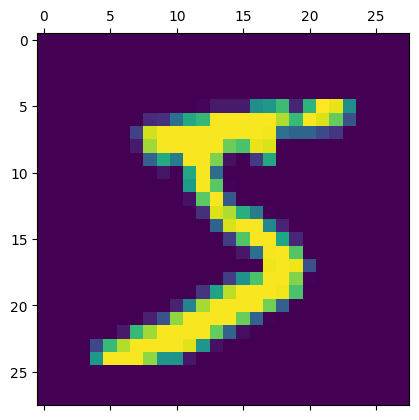

In [ ]:
plt.matshow(X_train[0])

In [ ]:
y_train[0]

np.uint8(5)

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
#Scaling values between 0 and 1 - this will allow us to improve our accuracy
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

In [ ]:
#Let's flatten the 2D array into a 1D array in order to feed it into the input of our neural network. We can do this by reshaping the dataset.

X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


In [ ]:
X_train_flattened[0]

In [ ]:
#Let's create a neural network. We will have 10 output neurons which classifys the digits from 0-9. We'll use a input shape of 784, representing 784 nodes that comes from the flattened array (28x28)
#We will use sigmoid as our activation function (σ(x)= 1/(1+e^-x)) in order to model the probability that a given input digit belongs to a certain class of digits
#Let's use the 'adam' optimizer to update the weights of the neural network during the training process
#We will use the 'sparse_categorical_crossentropy' loss function for multi-class classification
#We will use accuracy as our metric to determine the proportion of correclty predicted digits - simple yet effective
#fit the data using the training values and set epochs to 5(iterations over the entire training dataset)
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'softmax')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

In [ ]:
#Now we can evaluate to see how well our model performed
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9180 - loss: 0.3009


[0.26566264033317566, 0.9277999997138977]

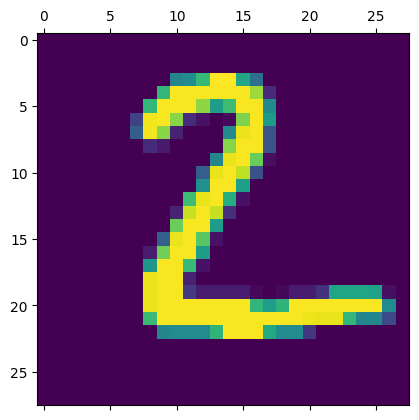

In [ ]:
plt.matshow(X_test[1])

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([5.3366417e-01, 4.5618564e-03, 9.9965119e-01, 4.8304427e-01,
       5.6850036e-10, 8.2899612e-01, 8.9521462e-01, 7.6989001e-13,
       1.7010441e-01, 2.3949507e-09], dtype=float32)

In [ ]:
np.argmax(y_predicted[1])

np.int64(2)

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

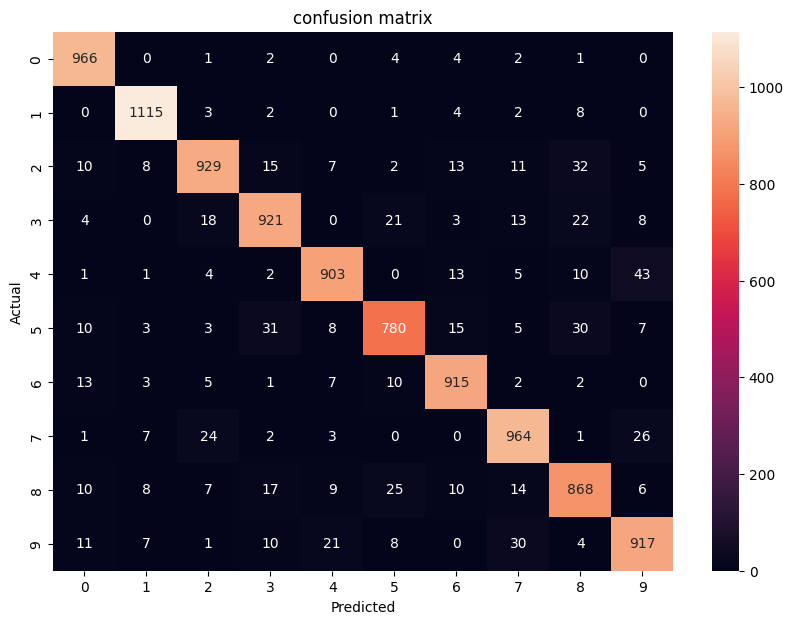

In [ ]:
#Let's visualize the accuracy of our predictions using a confusion matrix
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion matrix')
plt.show()

As we can see from the confusion matrix, a lot of the values that we have predicted, correctly corresponds to their actual values as seen by the orange diagonal line. In each box we see large numbers deonting the correct predictions. The black boxes are the values that we have incorrectly predicted. As we can the model performed relatively well, however there are still some boxes with larger numbers. Let's try to improve our predictions by making some changes to the model.

In [ ]:
#Adding hidden layer to improve performance
#Let's use 100 neurons in the hidden layer
#We can use the relu activation function (f(x)=max(0,x)) in our hidden layer
#Let's train using epochs = 10. This increases the iterations over the dataset leading to better performance. We can see that this is perfect, as with each iteration we are seeing an improvement in the accuracy, without overfitting.
#Keep everything else the same

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=10)

In [ ]:
#Let's evaluate our model based on the changes we've made
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9695 - loss: 0.1036


[0.08806271851062775, 0.9749000072479248]

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
from PIL import Image
import io

# Load the uploaded image
uploaded_image = Image.open(io.BytesIO(uploaded['image (2).png']))  # Replace 'your_image.jpg' with the name of your uploaded image

# Preprocess the image
processed_image = uploaded_image.convert('L').resize((28,28))
processed_image_arr = np.array(processed_image)
processed_image_arr = processed_image_arr / 255.0
processed_image_flattened = processed_image_arr.reshape(1, 28*28)

# Make predictions
predicted_digit = np.argmax(model.predict(processed_image_flattened))

print("Predicted digit:", predicted_digit)


In [ ]:
model.save('model.h5')


In [ ]:
from google.colab import files
files.download('model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 734.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 131.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 147.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.7 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:82: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 40ms/step - accuracy: 0.7326 - loss: 0.7758 - val_accuracy: 0.9757 - val_loss: 0.0701
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 39ms/step - accuracy: 0.9501 - loss: 0.1665 - val_accuracy: 0.9889 - val_loss: 0.0349
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 39ms/step - accuracy: 0.9629 - loss: 0.1241 - val_accuracy: 0.9894 - val_loss: 0.0311
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 40ms/step - accuracy: 0.9673 - loss: 0.1082 - val_accuracy: 0.9877 - val_loss: 0.0403
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 39ms/step - accuracy: 0.9688 - loss: 0.1006 - val_accuracy: 0.9914 - val_loss: 0.0253
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 40ms/step - accuracy: 0.9735 - loss: 0.0883 - val_accuracy: 0.9909 - val_loss: 0.0295
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 39ms/step - accuracy: 0.9748 - loss: 0.0830 - val_accuracy: 0.9918 - val_loss: 0.0271
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 39ms/step - accuracy: 0.9769 - loss: 0.0750 - val_accurac

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7062 - loss: 0.8706 - val_accuracy: 0.9334 - val_loss: 0.2119
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9043 - loss: 0.3053 - val_accuracy: 0.9439 - val_loss: 0.1784
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9217 - loss: 0.2543 - val_accuracy: 0.9438 - val_loss: 0.1791
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9275 - loss: 0.2320 - val_accuracy: 0.9571 - val_loss: 0.1442
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9354 - loss: 0.2089 - val_accuracy: 0.9516 - val_loss: 0.1520
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9372 - loss: 0.2009 - val_accuracy: 0.9621 - val_loss: 0.1251
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9417 - loss: 0.1850 - val_accuracy: 0.9632 - val_loss: 0.1221
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9431 - loss: 0.1803 - val_accuracy: 0.

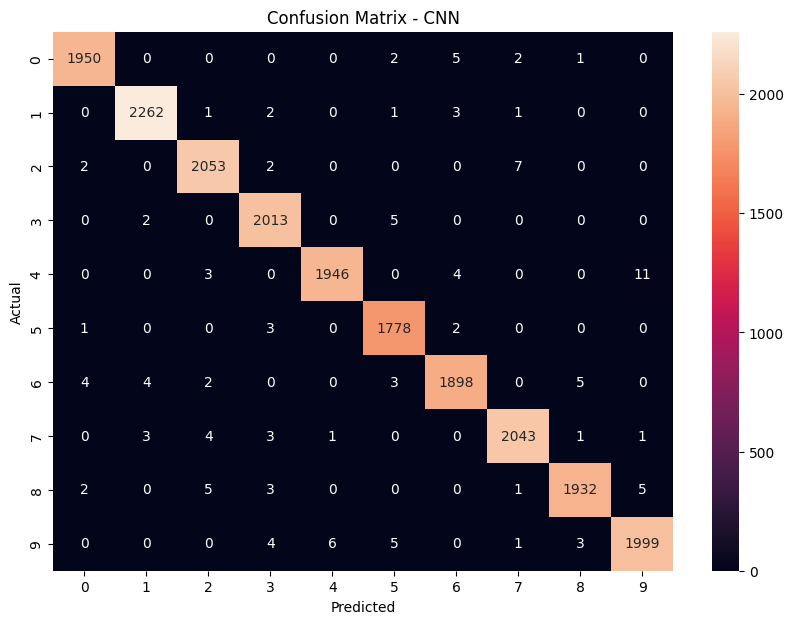

Classification Report (CNN):
              precision    recall  f1-score   support

           0     0.9954    0.9949    0.9952      1960
           1     0.9960    0.9965    0.9963      2270
           2     0.9927    0.9947    0.9937      2064
           3     0.9916    0.9965    0.9941      2020
           4     0.9964    0.9908    0.9936      1964
           5     0.9911    0.9966    0.9939      1784
           6     0.9927    0.9906    0.9916      1916
           7     0.9942    0.9937    0.9939      2056
           8     0.9949    0.9918    0.9933      1948
           9     0.9916    0.9906    0.9911      2018

    accuracy                         0.9937     20000
   macro avg     0.9937    0.9937    0.9937     20000
weighted avg     0.9937    0.9937    0.9937     20000

Macro Precision: 0.9937, Recall: 0.9937, F1-score: 0.9937

CNN Accuracy: 0.9937000274658203
Dense NN Accuracy: 0.972350001335144


In [1]:
# =====================
# 1️⃣ Install required packages
# =====================
!pip install tensorflow matplotlib seaborn scikit-learn pillow

# =====================
# 2️⃣ Import libraries
# =====================
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import seaborn as sn
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.utils import shuffle
from google.colab import files

# =====================
# 3️⃣ Load MNIST dataset
# =====================
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0

# =====================
# 4️⃣ Create inverted digits
# =====================
X_train_inv = 1.0 - X_train
X_test_inv  = 1.0 - X_test

# Combine normal + inverted
X_train_comb = np.concatenate((X_train, X_train_inv), axis=0)
y_train_comb = np.concatenate((y_train, y_train), axis=0)
X_test_comb  = np.concatenate((X_test, X_test_inv), axis=0)
y_test_comb  = np.concatenate((y_test, y_test), axis=0)

# Shuffle dataset
X_train_comb, y_train_comb = shuffle(X_train_comb, y_train_comb, random_state=42)
X_test_comb, y_test_comb   = shuffle(X_test_comb, y_test_comb, random_state=42)

# =====================
# 5️⃣ Prepare data for CNN & Dense
# =====================
X_train_cnn = X_train_comb.reshape(-1, 28, 28, 1)
X_test_cnn  = X_test_comb.reshape(-1, 28, 28, 1)

X_train_dense = X_train_comb.reshape(-1, 28*28)
X_test_dense  = X_test_comb.reshape(-1, 28*28)

# =====================
# 6️⃣ Data augmentation
# =====================
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    preprocessing_function=lambda x: 1-x if np.random.rand() < 0.5 else x  # random invert
)

# =====================
# 7️⃣ CNN Model
# =====================
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train CNN
cnn_model.fit(datagen.flow(X_train_cnn, y_train_comb, batch_size=128),
              validation_data=(X_test_cnn, y_test_comb),
              epochs=20)

# =====================
# 8️⃣ Dense NN
# =====================
dense_model = Sequential([
    Dense(512, input_shape=(784,), activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

dense_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

dense_model.fit(X_train_dense, y_train_comb, validation_data=(X_test_dense, y_test_comb),
                epochs=20, batch_size=128)

# =====================
# 9️⃣ Evaluate Models
# =====================
cnn_eval = cnn_model.evaluate(X_test_cnn, y_test_comb)
dense_eval = dense_model.evaluate(X_test_dense, y_test_comb)

# CNN Metrics
y_pred_cnn = np.argmax(cnn_model.predict(X_test_cnn), axis=1)
cm = tf.math.confusion_matrix(y_test_comb, y_pred_cnn)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CNN')
plt.show()

print("Classification Report (CNN):")
print(classification_report(y_test_comb, y_pred_cnn, digits=4))

precision = precision_score(y_test_comb, y_pred_cnn, average='macro')
recall    = recall_score(y_test_comb, y_pred_cnn, average='macro')
f1        = f1_score(y_test_comb, y_pred_cnn, average='macro')
print(f"Macro Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

print("\nCNN Accuracy:", cnn_eval[1])
print("Dense NN Accuracy:", dense_eval[1])

# Save models in modern Keras format
cnn_model.save("cnn_model_inverted.keras")
dense_model.save("dense_model_inverted.keras")




In [ ]:
# =====================
# 10️⃣ PIL Image Prediction Function
# =====================
def predict_image(image_path, cnn_model, dense_model):
    """
    Predict a handwritten digit from image using CNN and Dense NN models.
    """
    img = Image.open(image_path).convert('L')
    img_resized = img.resize((28,28))
    img_arr = np.array(img_resized)

    # Auto-invert if background is white
    if img_arr.mean() > 127:
        img_arr = 255 - img_arr
    img_arr = img_arr.astype('float32') / 255.0

    # CNN
    img_cnn = img_arr.reshape(1,28,28,1)
    cnn_pred = int(np.argmax(cnn_model.predict(img_cnn), axis=1)[0])

    # Dense
    img_dense = img_arr.reshape(1,28*28)
    dense_pred = int(np.argmax(dense_model.predict(img_dense), axis=1)[0])

    return cnn_pred, dense_pred

# =====================
# 11️⃣ Example Usage
# =====================
uploaded = files.upload()  # Upload handwritten digit image
image_path = next(iter(uploaded.keys()))
cnn_digit, dense_digit = predict_image(image_path, cnn_model, dense_model)
print(f"Predicted Digit (CNN): {cnn_digit}")
print(f"Predicted Digit (Dense NN): {dense_digit}")

The accuracy of our model has improved from 0.9252 to 0.9770. Our accuracy is nearly perfect!